## 代辦事項：
無法查看交易明細
台灣摩根史丹利 跟單

In [1]:
# 導入模塊
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import sqlite3
import sys
import datetime
import math
sys.path.append('..')
# silence warnings
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# sns.set(font='Taipei Sans TC Beta')

# 自定義模塊
import util.swingTrade as st

In [2]:
pd.set_option('display.max_columns', 80)
# pd.set_option('display.max_rows', 150)

# 要導入的資料

In [3]:
# mylist = []
# for chunk in  pd.read_csv(f'{st.getRootPath()}/大型資料/前15大買賣超.csv', chunksize=200000):
#     mylist.append(chunk)
# df_15 = pd.concat(mylist, axis= 0)
# del mylist

In [4]:
# df_15

In [5]:
df = st.getFullData(startDate='2010-01-01', columns=['成交值(千元)', '流通在外股數(千股)'])

# 處理未導入條件

## 價量

In [6]:

try:
    df['K棒收點'] = (df['收盤價(元)'] - df['最低價(元)']) / (df['最高價(元)'] - df['最低價(元)'])
    df['開盤價(元)'] = df['開盤價(元)'][df['開盤價(元)'] != 'N.A.']
    df['本益比-TEJ'] = df['本益比-TEJ'][df['本益比-TEJ'] != 'N.A.']
    df['開盤價(元)'] = pd.to_numeric(df['開盤價(元)'])
    df['本益比-TEJ'] = pd.to_numeric(df['本益比-TEJ'])
    df['年月日'] = pd.to_datetime(df['年月日'] )
    df['當沖收益'] = ((df['收盤價(元)'] - df['開盤價(元)']) / df['收盤價(元)'])
    df = df.set_index(['年月日', '證券代碼'])
    df['漲跌幅'] = df.groupby('證券代碼')['收盤價(元)'].pct_change() * 100
    df['開收比'] = (df['收盤價(元)'] - df['開盤價(元)']) / df['開盤價(元)'] * 100
    df['成交值等級'] = df.groupby('年月日')['成交值(千元)'].rank(ascending=False)
    df = df[~df.index.duplicated()]
except Exception as e :
    print(e)


In [7]:
df['年份'] = df.index.get_level_values(0).year
df['月份'] = df.index.get_level_values(0).month 
df

index    開盤價(元)    最高價(元)    最低價(元)    收盤價(元)  成交量(千股)  \
年月日        證券代碼                                                               
2010-01-04 1101 台泥     0.0   14.2051   14.3722   14.1633   14.3304     8299   
           1102 亞泥     1.0   16.6312   16.6553   16.3428   16.6072     6528   
           1103 嘉泥     2.0   11.4195   11.6705   11.1999   11.5450     5756   
           1104 環泥     3.0    9.2000    9.8308    9.2000    9.6731     7518   
           1108 幸福     4.0    6.2922    6.3978    6.2289    6.3556     3270   
...                    ...       ...       ...       ...       ...      ...   
2022-03-24 9951 皇田     NaN   73.5000   74.4000   73.5000   74.0000       53   
           9955 佳龍     NaN   33.2000   34.4000   31.7000   33.1500    18842   
           9958 世紀鋼    NaN  111.0000  122.0000  111.0000  119.5000    15715   
           9960 邁達康    NaN   25.4000   25.7000   25.4000   25.5000       35   
           9962 有益     NaN   21.0000   22.0000   20.8500   21.7000    12937   

                     成交值(千元)    報酬率％     週轉率％  流通在外股數(千股)  市值(百萬元)  最後揭示買價  \
年月日        證券代碼                                                              
2010-01-04 1101 台泥    283529  0.8824   0.2521     3292175   112921   34.25   
           1102 亞泥    224652 -0.1445   0.2186     2985735   103157   34.50   
           1103 嘉泥    105074  1.6575   0.8018      717877    13208   18.35   
           1104 環泥    137758  5.1429   1.2449      603891    11111   18.35   
           1108 幸福     29376  0.8939   0.8079      404738     3654    9.01   
...                      ...     ...      ...         ...      ...     ...   
2022-03-24 9951 皇田      3984  0.5435   0.0708       74900     5543   73.90   
           9955 佳龍    624908  3.5938  18.2563      103208     3421   33.00   
           9958 世紀鋼  1862629  7.1749   6.7941      231305    27641  119.00   
           9960 邁達康      895  0.3937   0.1042       33593      857   25.45   
           9962 有益    278941  4.3269  14.3394       90220     1958   21.65   

                     最後揭示賣價  報酬率-Ln  市值比重％  成交值比重％  成交筆數(筆)  本益比-TSE  本益比-TEJ  \
年月日        證券代碼                                                                 
2010-01-04 1101 台泥    34.30  0.8785  0.534   0.170     2839    18.85  18.5400   
           1102 亞泥    34.55 -0.1446  0.488   0.135     2076    14.58  14.4500   
           1103 嘉泥    18.40  1.6439  0.063   0.063     1558    40.89  66.3500   
           1104 環泥    18.40  5.0150  0.053   0.083     1582    73.60  74.4000   
           1108 幸福     9.03  0.8899  0.017   0.018      561     0.00      NaN   
...                     ...     ...    ...     ...      ...      ...      ...   
2022-03-24 9951 皇田    74.00  0.5420  0.107   0.006       55    13.88  10.6241   
           9955 佳龍    33.15  3.5307  0.006   0.246    10305      NaN      NaN   
           9958 世紀鋼  119.50  6.9292  0.051   0.734     9222    19.82  24.0111   
           9960 邁達康   25.55  0.3929  0.016   0.001       35    11.43  11.4286   
           9962 有益    21.70  4.2359  0.038   0.390     5735    14.00  20.3734   

                     股價淨值比-TSE  股價淨值比-TEJ   漲跌停  股價營收比-TEJ  股利殖利率-TSE   現金股利率  \
年月日        證券代碼                                                                 
2010-01-04 1101 台泥        1.47     1.4700  None     5.2500       3.85  3.8500   
           1102 亞泥        1.44     1.4400  None     9.7600       6.08  5.0600   
           1103 嘉泥        0.79     0.7900  None     5.2400       0.00  0.0000   
           1104 環泥        0.92     0.9200  None     3.5800       0.00  0.0000   
           1108 幸福        0.85     0.8500  None     1.2400       0.00  0.0000   
...                        ...        ...   ...        ...        ...     ...   
2022-03-24 9951 皇田        1.78     1.8385  None     1.0878       4.46  4.4595   
           9955 佳龍        2.25     2.2480  None     1.5665       0.00  0.0000   
           9958 世紀鋼       3.76     3.7658  None     2.9804       2.49  2.4962   
           9960 邁達康       1.70   

## 除權息資料

In [8]:
db_name = st.getDataPath('dailyChips.db')
conn = sqlite3.connect(db_name)
df_returnCall = pd.read_sql(con=conn, sql="SELECT * FROM 'resultsCall'")
df_returnCall['Q4_除息日'] = pd.to_datetime(df_returnCall['Q4_除息日'], format='%Y%m%d')
df_returnCall['年月日'] = df_returnCall['Q4_除息日']
df_returnCall['除權日(配股)'] = pd.to_datetime(df_returnCall['除權日(配股)'], format='%Y%m%d')
df_returnCall = df_returnCall.set_index(['年月日', '證券代碼'])
# df_returnCall = df_returnCall.loc[2015 : 2021, :]
df_returnCall['最近一次是否為除息日'] = 1
df = pd.merge(df, df_returnCall[['最近一次是否為除息日', '累計_現金股利(元)']], on=['年月日', '證券代碼'], how='left')
df

index    開盤價(元)    最高價(元)    最低價(元)    收盤價(元)  成交量(千股)  \
年月日        證券代碼                                                               
2010-01-04 1101 台泥     0.0   14.2051   14.3722   14.1633   14.3304     8299   
           1102 亞泥     1.0   16.6312   16.6553   16.3428   16.6072     6528   
           1103 嘉泥     2.0   11.4195   11.6705   11.1999   11.5450     5756   
           1104 環泥     3.0    9.2000    9.8308    9.2000    9.6731     7518   
           1108 幸福     4.0    6.2922    6.3978    6.2289    6.3556     3270   
...                    ...       ...       ...       ...       ...      ...   
2022-03-24 9951 皇田     NaN   73.5000   74.4000   73.5000   74.0000       53   
           9955 佳龍     NaN   33.2000   34.4000   31.7000   33.1500    18842   
           9958 世紀鋼    NaN  111.0000  122.0000  111.0000  119.5000    15715   
           9960 邁達康    NaN   25.4000   25.7000   25.4000   25.5000       35   
           9962 有益     NaN   21.0000   22.0000   20.8500   21.7000    12937   

                     成交值(千元)    報酬率％     週轉率％  流通在外股數(千股)  市值(百萬元)  最後揭示買價  \
年月日        證券代碼                                                              
2010-01-04 1101 台泥    283529  0.8824   0.2521     3292175   112921   34.25   
           1102 亞泥    224652 -0.1445   0.2186     2985735   103157   34.50   
           1103 嘉泥    105074  1.6575   0.8018      717877    13208   18.35   
           1104 環泥    137758  5.1429   1.2449      603891    11111   18.35   
           1108 幸福     29376  0.8939   0.8079      404738     3654    9.01   
...                      ...     ...      ...         ...      ...     ...   
2022-03-24 9951 皇田      3984  0.5435   0.0708       74900     5543   73.90   
           9955 佳龍    624908  3.5938  18.2563      103208     3421   33.00   
           9958 世紀鋼  1862629  7.1749   6.7941      231305    27641  119.00   
           9960 邁達康      895  0.3937   0.1042       33593      857   25.45   
           9962 有益    278941  4.3269  14.3394       90220     1958   21.65   

                     最後揭示賣價  報酬率-Ln  市值比重％  成交值比重％  成交筆數(筆)  本益比-TSE  本益比-TEJ  \
年月日        證券代碼                                                                 
2010-01-04 1101 台泥    34.30  0.8785  0.534   0.170     2839    18.85  18.5400   
           1102 亞泥    34.55 -0.1446  0.488   0.135     2076    14.58  14.4500   
           1103 嘉泥    18.40  1.6439  0.063   0.063     1558    40.89  66.3500   
           1104 環泥    18.40  5.0150  0.053   0.083     1582    73.60  74.4000   
           1108 幸福     9.03  0.8899  0.017   0.018      561     0.00      NaN   
...                     ...     ...    ...     ...      ...      ...      ...   
2022-03-24 9951 皇田    74.00  0.5420  0.107   0.006       55    13.88  10.6241   
           9955 佳龍    33.15  3.5307  0.006   0.246    10305      NaN      NaN   
           9958 世紀鋼  119.50  6.9292  0.051   0.734     9222    19.82  24.0111   
           9960 邁達康   25.55  0.3929  0.016   0.001       35    11.43  11.4286   
           9962 有益    21.70  4.2359  0.038   0.390     5735    14.00  20.3734   

                     股價淨值比-TSE  股價淨值比-TEJ   漲跌停  股價營收比-TEJ  股利殖利率-TSE   現金股利率  \
年月日        證券代碼                                                                 
2010-01-04 1101 台泥        1.47     1.4700  None     5.2500       3.85  3.8500   
           1102 亞泥        1.44     1.4400  None     9.7600       6.08  5.0600   
           1103 嘉泥        0.79     0.7900  None     5.2400       0.00  0.0000   
           1104 環泥        0.92     0.9200  None     3.5800       0.00  0.0000   
           1108 幸福        0.85     0.8500  None     1.2400       0.00  0.0000   
...                        ...        ...   ...        ...        ...     ...   
2022-03-24 9951 皇田        1.78     1.8385  None     1.0878       4.46  4.4595   
           9955 佳龍        2.25     2.2480  None     1.5665       0.00  0.0000   
           9958 世紀鋼       3.76     3.7658  None     2.9804       2.49  2.4962   
           9960 邁達康       1.70   

In [9]:
df['殖利率%'] = (df['累計_現金股利(元)'] / df['開盤價(元)']) * 100
df

index    開盤價(元)    最高價(元)    最低價(元)    收盤價(元)  成交量(千股)  \
年月日        證券代碼                                                               
2010-01-04 1101 台泥     0.0   14.2051   14.3722   14.1633   14.3304     8299   
           1102 亞泥     1.0   16.6312   16.6553   16.3428   16.6072     6528   
           1103 嘉泥     2.0   11.4195   11.6705   11.1999   11.5450     5756   
           1104 環泥     3.0    9.2000    9.8308    9.2000    9.6731     7518   
           1108 幸福     4.0    6.2922    6.3978    6.2289    6.3556     3270   
...                    ...       ...       ...       ...       ...      ...   
2022-03-24 9951 皇田     NaN   73.5000   74.4000   73.5000   74.0000       53   
           9955 佳龍     NaN   33.2000   34.4000   31.7000   33.1500    18842   
           9958 世紀鋼    NaN  111.0000  122.0000  111.0000  119.5000    15715   
           9960 邁達康    NaN   25.4000   25.7000   25.4000   25.5000       35   
           9962 有益     NaN   21.0000   22.0000   20.8500   21.7000    12937   

                     成交值(千元)    報酬率％     週轉率％  流通在外股數(千股)  市值(百萬元)  最後揭示買價  \
年月日        證券代碼                                                              
2010-01-04 1101 台泥    283529  0.8824   0.2521     3292175   112921   34.25   
           1102 亞泥    224652 -0.1445   0.2186     2985735   103157   34.50   
           1103 嘉泥    105074  1.6575   0.8018      717877    13208   18.35   
           1104 環泥    137758  5.1429   1.2449      603891    11111   18.35   
           1108 幸福     29376  0.8939   0.8079      404738     3654    9.01   
...                      ...     ...      ...         ...      ...     ...   
2022-03-24 9951 皇田      3984  0.5435   0.0708       74900     5543   73.90   
           9955 佳龍    624908  3.5938  18.2563      103208     3421   33.00   
           9958 世紀鋼  1862629  7.1749   6.7941      231305    27641  119.00   
           9960 邁達康      895  0.3937   0.1042       33593      857   25.45   
           9962 有益    278941  4.3269  14.3394       90220     1958   21.65   

                     最後揭示賣價  報酬率-Ln  市值比重％  成交值比重％  成交筆數(筆)  本益比-TSE  本益比-TEJ  \
年月日        證券代碼                                                                 
2010-01-04 1101 台泥    34.30  0.8785  0.534   0.170     2839    18.85  18.5400   
           1102 亞泥    34.55 -0.1446  0.488   0.135     2076    14.58  14.4500   
           1103 嘉泥    18.40  1.6439  0.063   0.063     1558    40.89  66.3500   
           1104 環泥    18.40  5.0150  0.053   0.083     1582    73.60  74.4000   
           1108 幸福     9.03  0.8899  0.017   0.018      561     0.00      NaN   
...                     ...     ...    ...     ...      ...      ...      ...   
2022-03-24 9951 皇田    74.00  0.5420  0.107   0.006       55    13.88  10.6241   
           9955 佳龍    33.15  3.5307  0.006   0.246    10305      NaN      NaN   
           9958 世紀鋼  119.50  6.9292  0.051   0.734     9222    19.82  24.0111   
           9960 邁達康   25.55  0.3929  0.016   0.001       35    11.43  11.4286   
           9962 有益    21.70  4.2359  0.038   0.390     5735    14.00  20.3734   

                     股價淨值比-TSE  股價淨值比-TEJ   漲跌停  股價營收比-TEJ  股利殖利率-TSE   現金股利率  \
年月日        證券代碼                                                                 
2010-01-04 1101 台泥        1.47     1.4700  None     5.2500       3.85  3.8500   
           1102 亞泥        1.44     1.4400  None     9.7600       6.08  5.0600   
           1103 嘉泥        0.79     0.7900  None     5.2400       0.00  0.0000   
           1104 環泥        0.92     0.9200  None     3.5800       0.00  0.0000   
           1108 幸福        0.85     0.8500  None     1.2400       0.00  0.0000   
...                        ...        ...   ...        ...        ...     ...   
2022-03-24 9951 皇田        1.78     1.8385  None     1.0878       4.46  4.4595   
           9955 佳龍        2.25     2.2480  None     1.5665       0.00  0.0000   
           9958 世紀鋼       3.76     3.7658  None     2.9804       2.49  2.4962   
           9960 邁達康       1.70   

In [10]:
df[df['最近一次是否為除息日'] == 1]

index   開盤價(元)   最高價(元)   最低價(元)   收盤價(元)  \
年月日        證券代碼                                                         
2010-03-05 9105 泰金寶-DR    46017.0   2.8939   2.9228   2.8939   2.9170   
2010-03-24 912398 友佳-DR   61397.0  10.6662  10.6662  10.2315  10.5993   
2010-04-26 9110 越南控-DR    87498.0  16.5784  16.5784  15.7708  15.7708   
2010-05-04 2430 燦坤        93820.0  35.6849  35.6849  33.3481  33.5915   
2010-05-13 9136 巨騰-DR    102960.0  19.5673  19.7360  19.4323  19.6348   
...                           ...      ...      ...      ...      ...   
2022-03-24 2108 南帝            NaN  65.8000  65.9000  64.4000  64.8000   
           6204 艾華            NaN  67.4000  68.3000  67.4000  68.3000   
           6581 鋼聯            NaN  84.8000  87.0000  84.7000  86.8000   
           6590 普鴻            NaN  65.7000  68.0000  65.6000  65.7000   
           8401 白紗科           NaN  18.0000  18.1000  17.5500  18.1000   

                         成交量(千股)  成交值(千元)    報酬率％     週轉率％  流通在外股數(千股)  \
年月日        證券代碼                                                          
2010-03-05 9105 泰金寶-DR      6093    30652  1.1485   0.7882      773034   
2010-03-24 912398 友佳-DR    12824   202351  5.7703  19.0833       67200   
2010-04-26 9110 越南控-DR      2545    42796 -3.0431   4.8714       52244   
2010-05-04 2430 燦坤          6543   460690 -6.0052   5.0959      128397   
2010-05-13 9136 巨騰-DR       1133    32902  1.2878   0.7081      160000   
...                          ...      ...     ...      ...         ...   
2022-03-24 2108 南帝         10775   699819 -1.2380   2.1882      492417   
           6204 艾華           195    13239  1.2397   0.8441       23102   
           6581 鋼聯           334    28594  2.0225   0.3002      111271   
           6590 普鴻            32     2133  0.4335   0.1749       18291   
           8401 白紗科         1044    18765 -2.0636   1.7388       60042   

                         市值(百萬元)  最後揭示買價  最後揭示賣價  報酬率-Ln  市值比重％  成交值比重％  \
年月日        證券代碼                                                           
2010-03-05 9105 泰金寶-DR      3903    5.04    5.05  1.1420    NaN     NaN   
2010-03-24 912398 友佳-DR     1065   15.80   15.85  5.6100    NaN     NaN   
2010-04-26 9110 越南控-DR       867   16.55   16.60 -3.0904    NaN     NaN   
2010-05-04 2430 燦坤          8859   68.90   69.00 -6.1931  0.043   0.491   
2010-05-13 9136 巨騰-DR       4656   29.05   29.10  1.2796    NaN     NaN   
...                          ...     ...     ...     ...    ...     ...   
2022-03-24 2108 南帝         31909   64.80   64.90 -1.2457  0.058   0.276   
           6204 艾華          1578   68.20   68.30  1.2320  0.030   0.019   
           6581 鋼聯          9658   86.60   86.90  2.0023  0.018   0.011   
           6590 普鴻          1202   65.80   66.80  0.4326  0.023   0.003   
           8401 白紗科         1087   18.10   18.15 -2.0851  0.021   0.026   

                         成交筆數(筆)  本益比-TSE  本益比-TEJ  股價淨值比-TSE  股價淨值比-TEJ  \
年月日        證券代碼                                                            
2010-03-05 9105 泰金寶-DR       664     0.00      NaN        NaN        NaN   
2010-03-24 912398 友佳-DR     2584     0.00      NaN        NaN        NaN   
2010-04-26 9110 越南控-DR       858     0.00      NaN        NaN        NaN   
2010-05-04 2430 燦坤          2986    10.85  10.2700       3.04     1.3400   
2010-05-13 9136 巨騰-DR        565     0.00      NaN        NaN        NaN   
...                          ...      ...      ...        ...        ...   
2022-03-24 2108 南帝          6473     4.34   3.6896       1.97     2.0545   
           6204 艾華           242     5.50  81.0121       3.42     3.4701   
           6581 鋼聯           182    17.09  17.6648       2.55     2.7348   
           6590 普鴻            40    14.16  17.5461       2.91     3.1368   
           8401 白紗科          665     9.23  12.8535       1.11     1.2022   

                          漲跌停  股價營收比-TEJ  股利殖利率-TSE    現金股利率  股價漲跌(元)  \
年月日        證券代碼                                                         
2010

## 導入EPS資料

In [11]:
df_EPS = st.getMonthlySells(startDate='2010-01-01', columns=['成交值(千元)', '流通在外股數(千股)'])
df_EPS['年月日'] = df_EPS['年月'].str.removesuffix('00:00:00')
df_EPS['年月日'] = pd.to_datetime(df_EPS['年月日'])
df_EPS['月份'] = df_EPS['年月日'].dt.month
df_EPS['年份'] = df_EPS['年月日'].dt.year
df_EPS['月份'] = pd.to_numeric(df_EPS['月份'])
df_EPS = df_EPS.set_index(['年月日', '證券代碼'])
df_EPS

index                   年月       營收發布日   單月營收(千元)  \
年月日        證券代碼                                                           
2010-01-01 1101 台泥    31875  2010-01-01 00:00:00         NaN  2054868.0   
           1102 亞泥    31876  2010-01-01 00:00:00         NaN   833884.0   
           1103 嘉泥    31877  2010-01-01 00:00:00         NaN   179828.0   
           1104 環泥    31878  2010-01-01 00:00:00         NaN   283637.0   
           1108 幸福    31879  2010-01-01 00:00:00         NaN   256813.0   
...                     ...                  ...         ...        ...   
2022-02-01 9951 皇田   268917  2022-02-01 00:00:00  20220308.0   338030.0   
           9955 佳龍   268918  2022-02-01 00:00:00  20220310.0   129636.0   
           9958 世紀鋼  268919  2022-02-01 00:00:00  20220309.0   756792.0   
           9960 邁達康  268920  2022-02-01 00:00:00  20220310.0    46886.0   
           9962 有益   268921  2022-02-01 00:00:00  20220309.0   255605.0   

                     去年單月營收(千元)  單月營收成長率％  單月營收與上月比％  單月營收與上月比％-成長月數  \
年月日        證券代碼                                                        
2010-01-01 1101 台泥    1601454.0     28.31      13.66             2.0   
           1102 亞泥     896089.0     -6.94       0.06             3.0   
           1103 嘉泥     207491.0    -13.33      -4.45            -1.0   
           1104 環泥     169126.0     67.71      -4.44            -1.0   
           1108 幸福     187366.0     37.06      -2.05            -1.0   
...                         ...       ...        ...             ...   
2022-02-01 9951 皇田     359021.0     -5.85     -21.39            -1.0   
           9955 佳龍      92992.0     39.41     -16.79            -2.0   
           9958 世紀鋼    552675.0     36.93      -3.48            -2.0   
           9960 邁達康     94133.0    -50.19     -25.53            -3.0   
           9962 有益     138933.0     83.98      20.91             1.0   

                      累計營收(千元)  去年累計營收(千元)  累計營收成長率％  歷史最高單月營收(千元)  \
年月日        證券代碼                                                      
2010-01-01 1101 台泥   2054868.0   1601454.0     28.31     2771490.0   
           1102 亞泥    833884.0    896089.0     -6.94     1603168.0   
           1103 嘉泥    179828.0    207491.0    -13.33      455648.0   
           1104 環泥    283637.0    169126.0     67.71      365498.0   
           1108 幸福    256813.0    187366.0     37.06      455339.0   
...                        ...         ...       ...           ...   
2022-02-01 9951 皇田    768016.0    860579.0    -10.76      620366.0   
           9955 佳龍    285434.0    355106.0    -19.62      803662.0   
           9958 世紀鋼  1540846.0   1063735.0     44.85     1108300.0   
           9960 邁達康   109842.0    149195.0    -26.38      122107.0   
           9962 有益    467010.0    277230.0     68.46      441721.0   

                     歷史最高單月營收-年月  與歷史最高單月營收比%  歷史最低單月營收(千元)  歷史最低單月營收-年月  \
年月日        證券代碼                                                            
2010-01-01 1101 台泥      200512.0       -25.86      731396.0     199202.0   
           1102 亞泥      199701.0       -47.99      469482.0     198802.0   
           1103 嘉泥      199806.0       -60.53      120471.0     200302.0   
           1104 環泥      199212.0       -22.40      139502.0     200109.0   
           1108 幸福      199601.0       -43.60      134866.0     200002.0   
...                          ...          ...           ...          ...   
2022-02-01 9951 皇田      201811.0       -45.51      140389.0     201201.0   
           9955 佳龍      202008.0       -83.87       89353.0     202107.0   
           9958 世紀鋼     202108.0       -31.72       99013.0     201810.0   
           9960 邁達康     201203.0       -61.60       24259.0     201602.0   
           9962 有益      201204.0       -42.13       98154.0     201602.0   

                     與歷史最低單月營收比% 創新高/低(歷史) 創新高/低(近一年) 創新高/低(同月)  \
年月日        證券代碼                                                   
2010-01-01 1101 台泥        180.95      None          H      None   
        

In [12]:
df_EPS = df_EPS[df_EPS['月份'] % 3 == 0]
df_EPS = df_EPS[['累計每股稅後盈餘(元)', '月份', '年份']]
df_EPS['季度'] = df_EPS['月份'] / 3
# df = pd.merge(df, df_EPS[['累計每股稅後盈餘(元)', '月份']], on=['年月日', '證券代碼'], how='left')
df_EPS

累計每股稅後盈餘(元)  月份    年份   季度
年月日        證券代碼                                
2010-03-01 1101 台泥          0.28   3  2010  1.0
           1102 亞泥          0.54   3  2010  1.0
           1103 嘉泥         -0.16   3  2010  1.0
           1104 環泥         -0.18   3  2010  1.0
           1108 幸福         -0.08   3  2010  1.0
...                          ...  ..   ...  ...
2021-12-01 9951 皇田          5.33  12  2021  4.0
           9955 佳龍         -0.95  12  2021  4.0
           9958 世紀鋼          NaN  12  2021  4.0
           9960 邁達康         2.54  12  2021  4.0
           9962 有益          1.55  12  2021  4.0

[77985 rows x 4 columns]

In [13]:
# df_fullYearEPS = df_EPS[df_EPS['月份'] == 12]
# df_fullYearEPS['全年EPS'] = df_fullYearEPS['累計每股稅後盈餘(元)']
# df_fullYearEPS['與去年全年EPS相比(倍)'] = df_fullYearEPS['全年EPS'] / df_fullYearEPS.groupby('證券代碼')['全年EPS'].shift(1)
# df_fullYearEPS

In [14]:
df_EPS['與去年同期相比(倍)'] = df_EPS['累計每股稅後盈餘(元)'] / df_EPS.groupby('證券代碼')['累計每股稅後盈餘(元)'].shift(4)
df_EPS.loc[:, '1101 台泥', :]

,累計每股稅後盈餘(元),月份,年份,季度,與去年同期相比(倍)
年月日,,,,,
2010-03-01,0.28,3,2010,1.0,NaN
2010-06-01,0.86,6,2010,2.0,NaN
2010-09-01,1.64,9,2010,3.0,NaN
2010-12-01,2.43,12,2010,4.0,NaN
2011-03-01,0.36,3,2011,1.0,1.285714
2011-06-01,1.10,6,2011,2.0,1.279070
2011-09-01,1.79,9,2011,3.0,1.091463
2011-12-01,2.33,12,2011,4.0,0.958848
2012-03-01,0.40,3,2012,1.0,1.111111


In [15]:
# pd.merge(df, df_EPS[['累計每股稅後盈餘(元)', '季度', '與去年同期相比(倍)']], on=['年月日', '證券代碼'], how='left')
# df引用index之年月日，拆分成年與季度，再與df_EPS merge，key使用 證券代號、年、季度
# 松林說應該先賦值到正確日期，再用fillna填滿
# df_EPS['去年全年EPS']
# df['前年全年EPS']
# df['去年全年EPS是否為前年兩倍']
# df['去年全年EPS是否為五年平均之1.7標準差以上']
# df_EPS.loc[:, '1101 台泥', :]

In [16]:
# df_midStop1 =  pd.DataFrame(index=df.index.union(df_EPS.index))
# df_midStop1 = pd.merge(df_midStop1, df_EPS[['累計每股稅後盈餘(元)', '季度', '與去年同期相比(倍)']], on=['年月日', "證券代碼"], how='left')
df_midStop1 = pd.DataFrame(index=df.index.union(df_EPS.index))
df_midStop1 = pd.merge(df_midStop1, df_EPS[['累計每股稅後盈餘(元)', '季度', '與去年同期相比(倍)']], on=['年月日', "證券代碼"], how='left')
df_midStop1['累計每股稅後盈餘(元)'] = df_midStop1.groupby('證券代碼')['累計每股稅後盈餘(元)'].fillna(method = 'ffill')
df_midStop1['季度'] = df_midStop1.groupby('證券代碼')['季度'].fillna(method = 'ffill')
df_midStop1['與去年同期相比(倍)'] = df_midStop1.groupby('證券代碼')['與去年同期相比(倍)'].fillna(method = 'ffill')
df_midStop1['2018-12-03' : '2019-12-03']
# df = pd.merge(df, df_EPS[['累計每股稅後盈餘(元)', '季度', '與去年同期相比(倍)']], on=['年月日', '證券代碼'], how='left')
# df

累計每股稅後盈餘(元)   季度  與去年同期相比(倍)
年月日        證券代碼                                  
2018-12-03 1101 台泥          4.37  4.0    2.152709
           1102 亞泥          3.54  4.0    2.034483
           1103 嘉泥          1.09  4.0    0.784173
           1104 環泥          1.62  4.0    0.750000
           1108 幸福         -0.44  4.0    1.760000
...                          ...  ...         ...
2019-12-03 9951 皇田          7.53  4.0    0.977922
           9955 佳龍          0.10  4.0   -0.038168
           9958 世紀鋼         3.53  4.0   20.764706
           9960 邁達康         0.82  4.0    0.788462
           9962 有益          0.13  4.0    0.125000

[416789 rows x 3 columns]

In [17]:
df = pd.merge(df, df_midStop1[['累計每股稅後盈餘(元)', '季度', '與去年同期相比(倍)']], on=['年月日', "證券代碼"], how='left')

In [18]:
df['2018-12-03' : '2019-12-03']

index   開盤價(元)   最高價(元)   最低價(元)   收盤價(元)  成交量(千股)  \
年月日        證券代碼                                                               
2018-12-03 1101 台泥   3138153.0  25.4200  26.1837  25.3836  26.0746    26938   
           1102 亞泥   3138154.0  28.3061  28.3061  27.6908  28.3061    15319   
           1103 嘉泥   3138155.0  11.7886  11.8717  11.7471  11.7886     1349   
           1104 環泥   3138156.0  16.4110  16.5392  16.3255  16.4965       95   
           1108 幸福   3138157.0   6.7350   6.8933   6.7350   6.8933      154   
...                        ...      ...      ...      ...      ...      ...   
2019-12-03 9951 皇田   3547998.0  80.6541  83.3882  80.6541  82.9325      440   
           9955 佳龍   3547999.0  18.5000  18.5000  18.2000  18.2500      161   
           9958 世紀鋼  3548000.0  67.7747  69.5100  67.7747  68.9316     1361   
           9960 邁達康  3548001.0  29.8375  29.8375  29.8375  29.8375        0   
           9962 有益   3548002.0  10.0500  10.0500   9.9600   9.9600       12   

                     成交值(千元)    報酬率％    週轉率％  流通在外股數(千股)  市值(百萬元)  最後揭示買價  \
年月日        證券代碼                                                             
2018-12-03 1101 台泥    957538  3.9130  0.5274     5108060   183124   35.80   
           1102 亞泥    524659  2.3739  0.4557     3361447   115970   34.45   
           1103 嘉泥     19193  0.7092  0.1741      774781    11002   14.20   
           1104 環泥      1841  1.8470  0.0145      653609    12615   19.25   
           1108 幸福      1135  0.0000  0.0380      404738     2995    7.40   
...                      ...     ...     ...         ...      ...     ...   
2019-12-03 9951 皇田     39744  2.4775  0.5874       74900     6816   91.00   
           9955 佳龍      2953  0.2747  0.1560      103208     1884   18.25   
           9958 世紀鋼    97268  1.2748  0.6487      209795    15000   71.50   
           9960 邁達康        0  0.0000  0.0000       33593     1072   31.30   
           9962 有益       119 -0.2004  0.0133       90220      899    9.96   

                     最後揭示賣價  報酬率-Ln  市值比重％  成交值比重％  成交筆數(筆)  本益比-TSE  \
年月日        證券代碼                                                        
2018-12-03 1101 台泥    35.85  3.8384  0.604   0.630     9128     9.85   
           1102 亞泥    34.50  2.3461  0.383   0.345     5961    10.55   
           1103 嘉泥    14.25  0.7067  0.036   0.013      490     5.02   
           1104 環泥    19.30  1.8301  0.042   0.001       63    11.03   
           1108 幸福     7.43  0.0000  0.010   0.001       43      NaN   
...                     ...     ...    ...     ...      ...      ...   
2019-12-03 9951 皇田    91.20  2.4473  0.205   0.138      395    11.61   
           9955 佳龍    18.35  0.2743  0.005   0.003      108   114.06   
           9958 世紀鋼   71.60  1.2667  0.043   0.095      840    24.74   
           9960 邁達康   31.85  0.0000  0.032   0.000        0    33.18   
           9962 有益    10.00 -0.2006  0.027   0.000        8    99.60   

                      本益比-TEJ  股價淨值比-TSE  股價淨值比-TEJ   漲跌停  股價營收比-TEJ  \
年月日        證券代碼                                                        
2018-12-03 1101 台泥     9.5800       1.08     1.0800  None     1.5400   
           1102 亞泥    10.7200       0.84     0.8400  None     1.4400   
           1103 嘉泥        NaN       0.44     0.5300  None     5.4000   
           1104 環泥    11.1500       0.71     0.7100  None     2.7700   
           1108 幸福        NaN       0.69     0.6900  None     0.9100   
...                       ...        ...        ...   ...        ...   
2019-12-03 9951 皇田    11.6888       2.50     2.5005  None     1.1251   
           9955 佳龍   101.5660       1.08     1.0839  None     1.0487   
           9958 世紀鋼       NaN       3.47     3.4803  None     8.1659   
           9960 邁達康   33.0961       2.35     2.3577  None     2.5044   
           9962 有益    90.9781       0.96     0.9557  None     0.3772   

                     股利殖利率-TSE   現金股利率  股價漲跌(元)     高低價差%  次日開盤參考價   次日漲停價  \
年月日        證券代碼                            

In [19]:
# df['上期累計每股稅後盈餘(元)'] = df.groupby('證券代碼')['累計每股稅後盈餘(元)'].fillna(method = 'ffill')
# df['上期與去年同期相比(倍)'] = df.groupby('證券代碼')['與去年同期相比(倍)'].fillna(method = 'ffill')
# df_fullYearEPS

In [20]:
# df_fullYearEPS[df_fullYearEPS['近五年標準差'].notna()]

In [21]:

df_fullYearEPS = df_EPS[df_EPS['月份'] == 12]
df_fullYearEPS['去年全年EPS'] = df_fullYearEPS['累計每股稅後盈餘(元)']
df_fullYearEPS['去年與前年全年EPS相比(倍)'] = df_fullYearEPS['去年全年EPS'] / df_fullYearEPS.groupby('證券代碼')['去年全年EPS'].shift(1)
df_fullYearEPS['近五年標準差'] = df_fullYearEPS.pivot_table(index='年月日', columns='證券代碼', values='去年全年EPS').rolling(5).std().unstack().swaplevel()
df_fullYearEPS['近五年年均'] = df_fullYearEPS.pivot_table(index='年月日', columns='證券代碼', values='去年全年EPS').rolling(5).mean().unstack().swaplevel()

df_fullYearEPS['2015-12-01' : '2020-12-01']

累計每股稅後盈餘(元)  月份    年份   季度  與去年同期相比(倍)  去年全年EPS  \
年月日        證券代碼                                                        
2015-12-01 1101 台泥          1.56  12  2015  4.0    0.532423     1.56   
           1102 亞泥          1.55  12  2015  4.0    0.520134     1.55   
           1103 嘉泥          0.34  12  2015  4.0   11.333333     0.34   
           1104 環泥          2.22  12  2015  4.0    0.982301     2.22   
           1108 幸福          1.16  12  2015  4.0    1.234043     1.16   
...                          ...  ..   ...  ...         ...      ...   
2020-12-01 9951 皇田          6.69  12  2020  4.0    0.888446     6.69   
           9955 佳龍         -1.19  12  2020  4.0  -11.900000    -1.19   
           9958 世紀鋼         4.38  12  2020  4.0    1.240793     4.38   
           9960 邁達康         1.41  12  2020  4.0    1.719512     1.41   
           9962 有益          0.01  12  2020  4.0    0.076923     0.01   

                     去年與前年全年EPS相比(倍)    近五年標準差  近五年年均  
年月日        證券代碼                                        
2015-12-01 1101 台泥          0.532423  0.539101  2.326  
           1102 亞泥          0.520134  0.823911  2.614  
           1103 嘉泥         11.333333  1.107894  0.294  
           1104 環泥          0.982301  0.698570  1.630  
           1108 幸福          1.234043  0.582520  0.524  
...                              ...       ...    ...  
2020-12-01 9951 皇田          0.888446  1.254085  8.134  
           9955 佳龍        -11.900000  0.977998 -1.154  
           9958 世紀鋼         1.240793  2.029525  1.758  
           9960 邁達康         1.719512  0.781198  0.688  
           9962 有益          0.076923  0.433163  0.516  

[10268 rows x 9 columns]

In [22]:
df_midStop = pd.DataFrame(index=df.index.union(df_fullYearEPS.index))
df_midStop = pd.merge(df_midStop, df_fullYearEPS[['去年全年EPS', '去年與前年全年EPS相比(倍)', '近五年標準差', '近五年年均']], on=['年月日', "證券代碼"], how='left')
df_midStop['去年全年EPS'] = df_midStop.groupby('證券代碼')['去年全年EPS'].fillna(method = 'ffill')
df_midStop['去年與前年全年EPS相比(倍)'] = df_midStop.groupby('證券代碼')['去年與前年全年EPS相比(倍)'].fillna(method = 'ffill')
df_midStop['近五年標準差'] = df_midStop.groupby('證券代碼')['近五年標準差'].fillna(method = 'ffill')
df_midStop['近五年年均'] = df_midStop.groupby('證券代碼')['近五年年均'].fillna(method = 'ffill')
df_midStop['2018-12-03' : '2019-12-03']


去年全年EPS  去年與前年全年EPS相比(倍)    近五年標準差  近五年年均
年月日        證券代碼                                               
2018-12-03 1101 台泥      4.37         2.152709  1.161064  2.522
           1102 亞泥      3.54         2.034483  0.990040  2.214
           1103 嘉泥      1.09         0.784173  0.626075  0.578
           1104 環泥      1.62         0.750000  0.378048  2.188
           1108 幸福     -0.44         1.760000  0.730493  0.438
...                      ...              ...       ...    ...
2019-12-03 9951 皇田      7.53         0.977922  0.967600  8.550
           9955 佳龍      0.10        -0.038168  0.978530 -1.162
           9958 世紀鋼     3.53        20.764706  1.404254  1.086
           9960 邁達康     0.82         0.788462  0.670582  0.486
           9962 有益      0.13         0.125000  0.695967  0.368

[411585 rows x 4 columns]

In [23]:
df = pd.merge(df, df_midStop[['去年全年EPS', '去年與前年全年EPS相比(倍)', '近五年標準差', '近五年年均']], on=['年月日', "證券代碼"], how='left')

In [24]:
df['2011-12-03' : '2012-07-09']

index   開盤價(元)   最高價(元)   最低價(元)   收盤價(元)  成交量(千股)  \
年月日        證券代碼                                                              
2011-12-05 1101 台泥   585033.0  16.4563  16.5979  16.3382  16.5271     7654   
           1102 亞泥   585034.0  18.8995  18.9275  18.6751  18.8714     2240   
           1103 嘉泥   585035.0   8.8609   8.8609   8.6572   8.7590      597   
           1104 環泥   585036.0   8.1484   8.1484   7.9756   8.0044      123   
           1108 幸福   585037.0   3.9586   3.9946   3.8866   3.9226      116   
...                       ...      ...      ...      ...      ...      ...   
2012-07-09 9951 皇田   778209.0  19.8864  20.4426  19.8864  20.4426       58   
           9955 佳龍   778210.0  23.6489  23.6489  23.4025  23.5503       48   
           9958 世紀鋼  778211.0   6.2104   6.2401   6.1287   6.2178       42   
           9960 邁達康  778212.0  13.8136  13.8136  13.8136  13.8136        1   
           9962 有益   778213.0   6.9459   7.0734   6.9459   7.0415       83   

                     成交值(千元)    報酬率％    週轉率％  流通在外股數(千股)  市值(百萬元)  最後揭示買價  \
年月日        證券代碼                                                             
2011-12-05 1101 台泥    266929  0.7194  0.2073     3692175   129226   34.95   
           1102 亞泥     75121 -0.1484  0.0714     3136813   105553   33.65   
           1103 嘉泥      7693 -1.1494  0.0792      754202     9729   12.90   
           1104 環泥      1722 -0.7143  0.0204      603891     8394   13.90   
           1108 幸福       632 -1.8018  0.0287      404738     2205    5.44   
...                      ...     ...     ...         ...      ...     ...   
2012-07-09 9951 皇田      1685  0.0000  0.0774       74900     2202   29.35   
           9955 佳龍      1172  0.0000  0.0450      106768     2551   23.90   
           9958 世紀鋼      351  0.8434  0.0304      138186     1156    8.36   
           9960 邁達康       21  0.7614  0.0031       32300      641   19.35   
           9962 有益       911  0.9132  0.0920       90220      996   10.95   

                     最後揭示賣價  報酬率-Ln  市值比重％  成交值比重％  成交筆數(筆)  本益比-TSE  本益比-TEJ  \
年月日        證券代碼                                                                 
2011-12-05 1101 台泥    35.00  0.7168  0.673   0.450     2582    13.94    13.83   
           1102 亞泥    33.70 -0.1485  0.550   0.127      984     9.87    10.98   
           1103 嘉泥    12.95 -1.1561  0.051   0.013      242    31.46    22.24   
           1104 環泥    14.00 -0.7168  0.044   0.003       61    17.82    14.95   
           1108 幸福     5.50 -1.8182  0.011   0.001       53     0.00      NaN   
...                     ...     ...    ...     ...      ...      ...      ...   
2012-07-09 9951 皇田    29.40  0.0000  0.131   0.023       30     7.70     6.62   
           9955 佳龍    24.00  0.0000  0.013   0.002       28    27.47    27.91   
           9958 世紀鋼    8.37  0.8398  0.006   0.001       23     0.00      NaN   
           9960 邁達康   19.80  0.7585  0.038   0.000        2    11.61    13.10   
           9962 有益    11.05  0.9091  0.059   0.012       28    73.67    73.03   

                     股價淨值比-TSE  股價淨值比-TEJ   漲跌停  股價營收比-TEJ  股利殖利率-TSE  現金股利率  \
年月日        證券代碼                                                                
2011-12-05 1101 台泥        1.38       1.38  None       5.46       5.71   5.71   
           1102 亞泥        1.32       1.32  None       9.83       6.24   5.54   
           1103 嘉泥        0.61       0.61  None       8.05       4.65   2.26   
           1104 環泥        0.68       0.68  None       2.51       7.19   7.19   
           1108 幸福        0.54       0.54  None       0.70       0.00   0.00   
...                        ...        ...   ...        ...        ...    ...   
2012-07-09 9951 皇田        1.88       1.88  None       1.47       8.50   8.50   
           9955 佳龍        1.03       1.03  None       0.33       0.00   0.00   
           9958 世紀鋼       0.76       0.76  None       0.62       0.00   0.00   
           9960 邁達康       1.39       1.39  None       1.36       4.03   5

In [25]:
# df['2019-04-01' : '2020-09-20']
# df.loc['2018-04-01' : '2020-09-20', '9951 皇田', :]
# df['2018-04-01' : '2020-09-20']

In [26]:
trade_position = df.pivot_table(index='年月日', columns='證券代碼', values='開盤價(元)')
trade_position = df.pivot_table(index='年月日', columns='證券代碼', values='收盤價(元)')

In [27]:
df = df[~df.index.duplicated()]

In [28]:
%%time
# 10張以下占比變化	400以上占比變化	
df['放在最後用'] = 1
strategy_map = {
  '進場': (
    # (df.index.get_level_values(1) == '3035 智原') &
    (df.groupby('證券代碼')['最近一次是否為除息日'].shift(1) == 1) &
    (df.groupby('證券代碼')['殖利率%'].shift(1) > 8.5 ) &
    (df.groupby('證券代碼')['去年與前年全年EPS相比(倍)'].shift(1) >= 2) &
    (df.groupby('證券代碼')['與去年同期相比(倍)'].shift(1) <= 0.5) &
    (df['去年全年EPS'] > df['近五年年均'] + 1.7 * df['近五年標準差']) &
    # (df['近五年標準差'].notna()) &
    # (df.groupby('證券代碼')['本益比-TEJ'].shift(1) > 15) &
    (df['放在最後用'] == 1)
  ),
  '出場': (
    (df.groupby('證券代碼')['最近一次是否為除息日'].shift(40) == 1) &
    (df['放在最後用'] == 1)
  )
}

CPU times: total: 1.12 s
Wall time: 1.14 s


,總報酬,持有最大支數,總交易次數,每筆投入金額,均筆獲利,均筆獲利％,勝率
0,-254342.396007,4.0,19.0,500000.0,-13386.441895,-2.677288,31.578947


findfont: Font family ['Taipei Sans TC Beta'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Taipei Sans TC Beta'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Taipei Sans TC Beta'] not found. Falling back to DejaVu Sans.


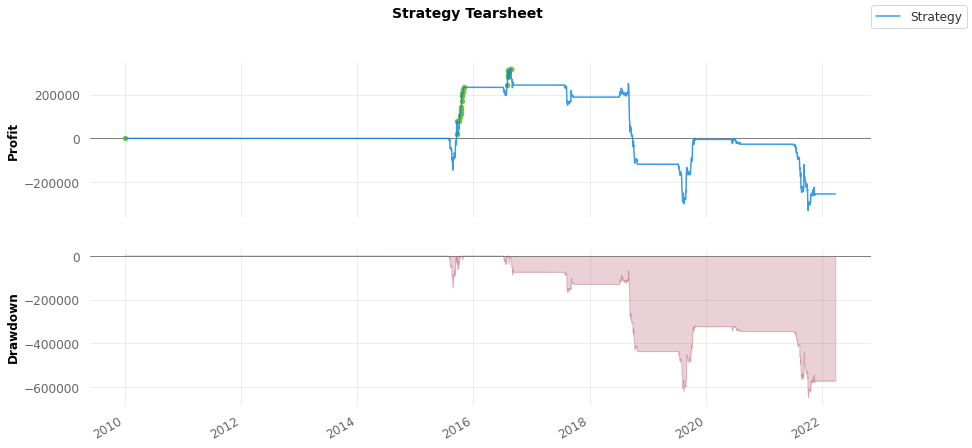

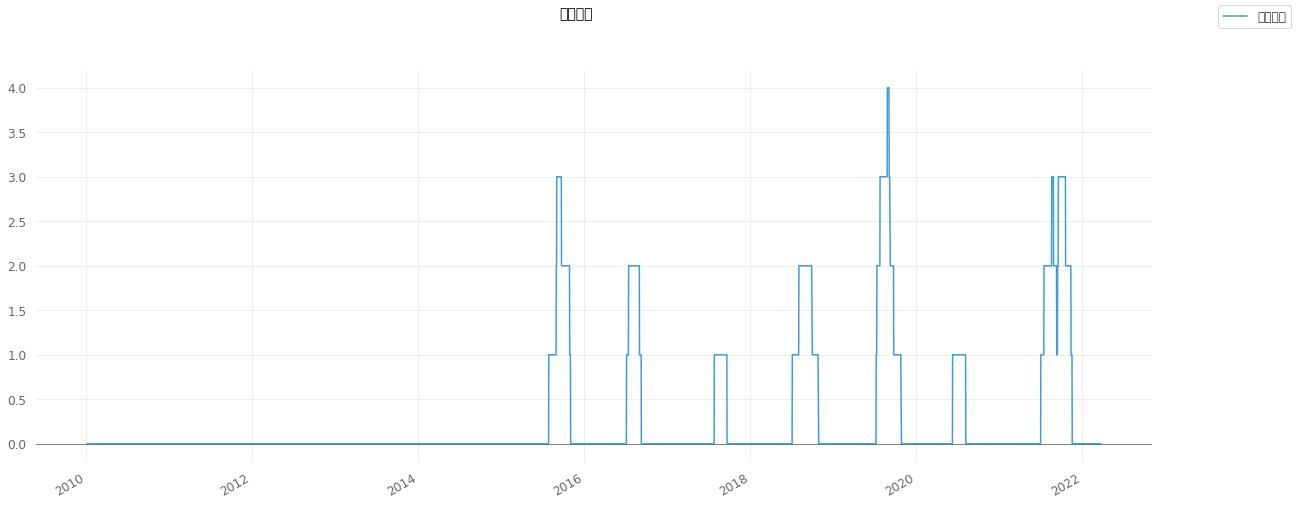

CPU times: total: 1min 28s
Wall time: 1min 28s


In [29]:
%%time
import importlib
%load_ext autoreload
%autoreload 2
importlib.reload(st)

backtest = st.Backtest(df[['開盤價(元)', '最高價(元)', '最低價(元)', '收盤價(元)']], trade_position=trade_position,  stockCash=500000)
report = backtest.run(strategy_map)
# profit = backtest.run(strategy_map)
# report = backtest.getDetailInfo(strategy_map)
profit = backtest.profit

In [30]:
%%time
df_stock = backtest.read_stock()
df_stock

CPU times: total: 5.12 s
Wall time: 5.13 s


,進場張數,不含成本進場價,不含成本出場價,不含成本獲利趴數,進場時間,出場時間,持有天數
證券代碼,,,,,,,
2402 毅嘉,27.0,18.1493,16.9667,-6.515954,2015-07-30,2015-09-23,55
6138 茂達,31.0,16.0694,21.2418,32.187885,2015-09-01,2015-10-29,58
3040 遠見,29.0,16.9109,20.8410,23.240040,2015-09-03,2015-11-02,60
2316 楠梓電,18.0,26.5858,23.8474,-10.300235,2016-07-06,2016-08-31,56
1452 宏益,33.0,14.8053,16.7593,13.197976,2016-07-15,2016-09-08,55
6235 華孚,28.0,17.6095,15.7194,-10.733411,2017-07-27,2017-09-20,55
1419 新紡,12.0,39.3643,41.4656,5.338086,2018-07-05,2018-08-29,55
3088 艾訊,10.0,49.4914,47.0832,-4.865896,2018-08-03,2018-09-28,56
4303 信立,12.0,41.0319,15.8052,-61.480702,2018-08-30,2018-10-26,57


In [31]:
%%time
# 10張以下占比變化	400以上占比變化	
df['放在最後用'] = 1
strategy_map = {
  '進場': (
    # (df.index.get_level_values(1) == '3035 智原') &
    (df.groupby('證券代碼')['最近一次是否為除息日'].shift(1) == 1) &
    (df.groupby('證券代碼')['殖利率%'].shift(1) > 8.5 ) &
    (df.groupby('證券代碼')['去年與前年全年EPS相比(倍)'].shift(1) >= 2) &
    (df.groupby('證券代碼')['與去年同期相比(倍)'].shift(1) <= 0.5) &
    # (df.groupby('證券代碼')['本益比-TEJ'].shift(1) > 15) &
    (df['放在最後用'] == 1)
  ),
  '出場': (
    (df.groupby('證券代碼')['最近一次是否為除息日'].shift(20) == 1) &
    (df['放在最後用'] == 1)
  )
}

CPU times: total: 953 ms
Wall time: 952 ms


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,總報酬,持有最大支數,總交易次數,每筆投入金額,均筆獲利,均筆獲利％,勝率
0,2.227988e+06,6.0,93.0,-500000.0,23956.864644,-4.791373,76.344086


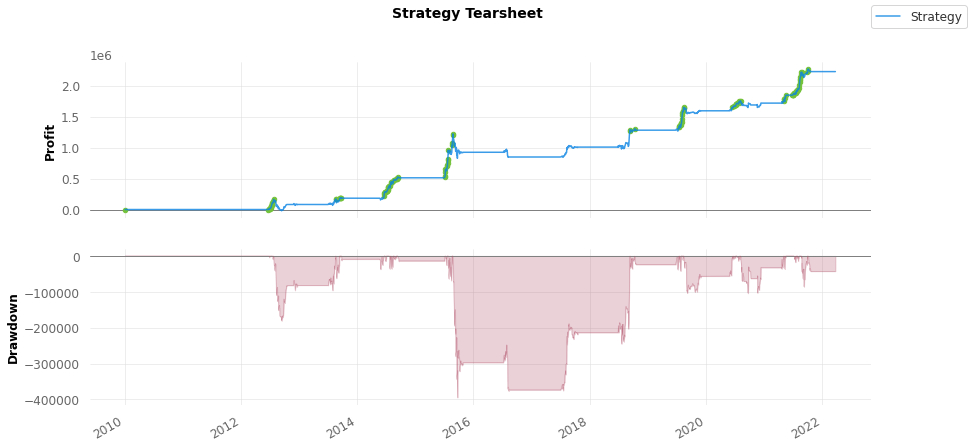

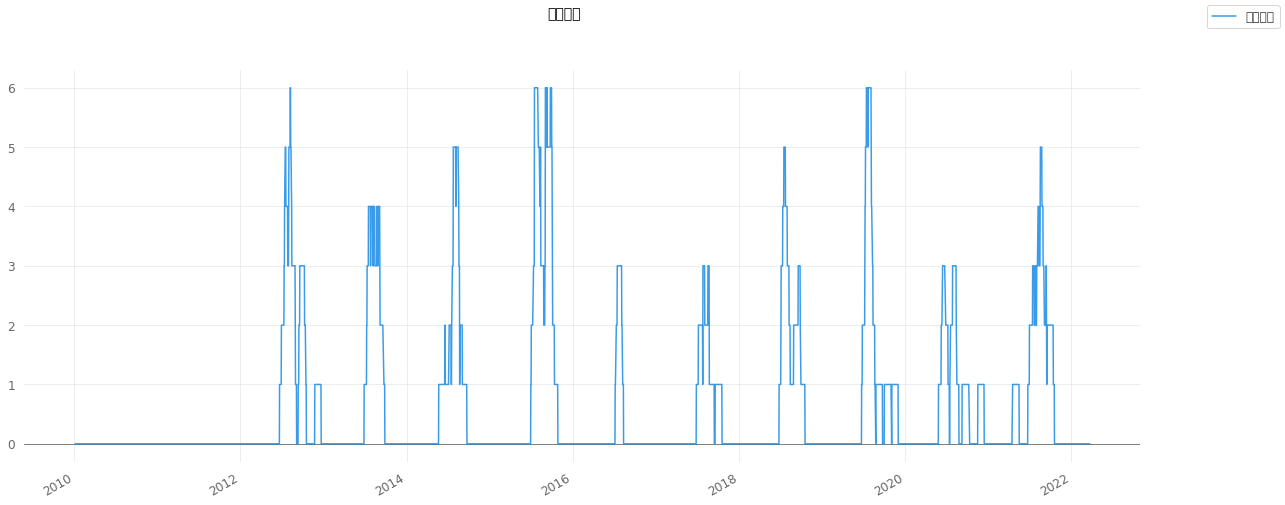

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [33]:
%%time
import importlib
%load_ext autoreload
%autoreload 2
importlib.reload(st)

backtest = st.Backtest(df[['開盤價(元)', '最高價(元)', '最低價(元)', '收盤價(元)']], trade_position=trade_position,  stockCash=-500000)
report = ~backtest.run(strategy_map)
# profit = backtest.run(strategy_map)
# report = backtest.getDetailInfo(strategy_map)
profit = backtest.profit

In [ ]:
# backtest.df_position

In [ ]:
# %%time
# import importlib
# %load_ext autoreload
# %autoreload 2
# importlib.reload(st)

# backtest = st.Backtest(df[['開盤價(元)', '最高價(元)', '最低價(元)', '收盤價(元)']], trade_position=trade_position,  stockCash=-500000)
# report = backtest.run(strategy_map)
# # profit = backtest.run(strategy_map)
# # report = backtest.getDetailInfo(strategy_map)
# profit = backtest.profit

In [ ]:
%%time
df_stock = backtest.read_stock()
df_stock

CPU times: total: 5.34 s
Wall time: 5.32 s


,進場張數,不含成本進場價,不含成本出場價,不含成本獲利趴數,進場時間,出場時間,持有天數
證券代碼,,,,,,,
2038 海光,45.0,11.0777,9.5213,-14.049848,2012-06-21,2012-07-18,27
2367 燿華,64.0,7.7900,7.8056,0.200257,2012-07-16,2012-08-13,28
3546 宇峻,17.0,29.3236,28.4890,-2.846172,2013-07-17,2013-08-13,27
3483 力致,37.0,13.3304,12.2950,-7.767209,2013-07-29,2013-08-26,28
8930 青鋼,50.0,9.9235,9.6316,-2.941502,2014-07-07,2014-08-04,28
8088 品安,23.0,21.1194,18.9610,-10.219987,2014-07-18,2014-08-15,28
1532 勤美,22.0,22.1776,22.1776,0.000000,2014-08-06,2014-09-02,27
2415 錩新,46.0,10.8473,10.0327,-7.509703,2015-07-17,2015-08-13,27
3040 遠見,29.0,16.9109,17.2983,2.290830,2015-09-03,2015-10-02,29


In [ ]:
%%time
# 10張以下占比變化	400以上占比變化	
df['放在最後用'] = 1
strategy_map = {
  '進場': (
    # (df.index.get_level_values(1) == '3035 智原') &
    (df.groupby('證券代碼')['最近一次是否為除息日'].shift(1) == 1) &
    (df.groupby('證券代碼')['殖利率%'].shift(1) > 8.5 ) &
    (df.groupby('證券代碼')['去年與前年全年EPS相比(倍)'].shift(1) >= 2) &
    (df.groupby('證券代碼')['與去年同期相比(倍)'].shift(1) <= 0.5) &
    (df['去年全年EPS'] > df['近五年年均'] + 1.7 * df['近五年標準差']) &
    # (df['近五年標準差'].notna()) &
    # (df.groupby('證券代碼')['本益比-TEJ'].shift(1) > 15) &
    (df['放在最後用'] == 1)
  ),
  '出場': (
    (df.groupby('證券代碼')['最近一次是否為除息日'].shift(20) == 1) &
    (df['放在最後用'] == 1)
  )
}

CPU times: total: 1.06 s
Wall time: 1.07 s


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,總報酬,持有最大支數,總交易次數,每筆投入金額,均筆獲利,均筆獲利％,勝率
0,-553331.929589,3.0,19.0,500000.0,-29122.733136,-5.824547,31.578947


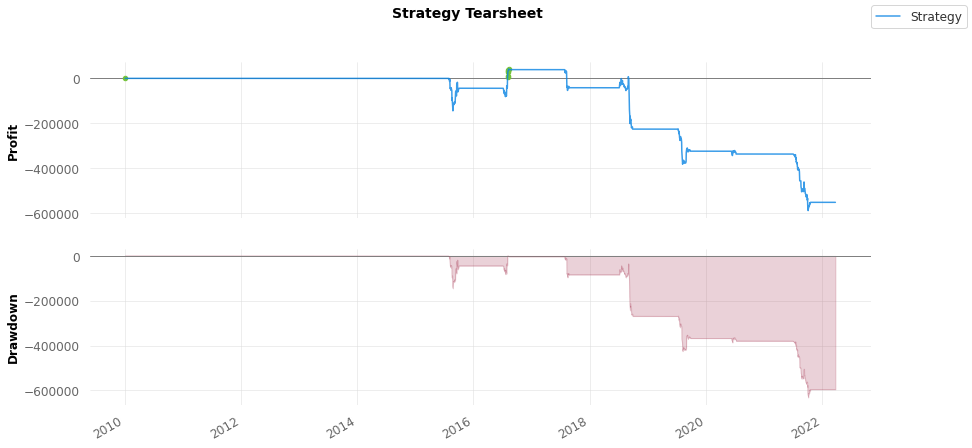

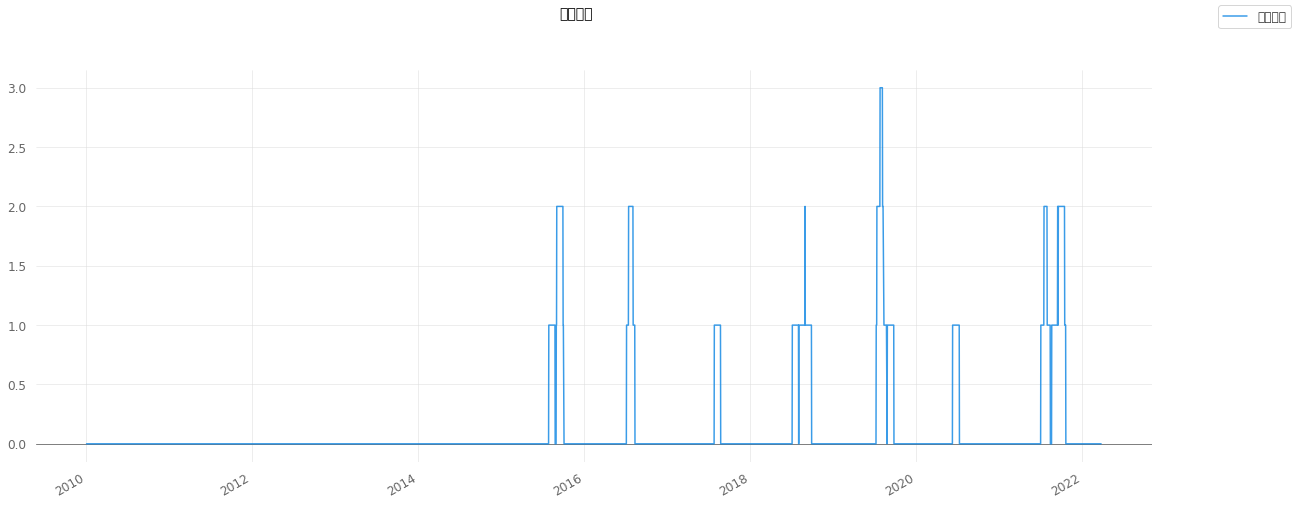

CPU times: total: 1min 35s
Wall time: 1min 35s


In [ ]:
%%time
import importlib
%load_ext autoreload
%autoreload 2
importlib.reload(st)

backtest = st.Backtest(df[['開盤價(元)', '最高價(元)', '最低價(元)', '收盤價(元)']], trade_position=trade_position,  stockCash=500000)
report = backtest.run(strategy_map)
# profit = backtest.run(strategy_map)
# report = backtest.getDetailInfo(strategy_map)
profit = backtest.profit

In [ ]:
%%time
df_stock = backtest.read_stock()
df_stock

CPU times: total: 5.27 s
Wall time: 5.26 s


,進場張數,不含成本進場價,不含成本出場價,不含成本獲利趴數,進場時間,出場時間,持有天數
證券代碼,,,,,,,
2402 毅嘉,27.0,18.1493,14.0555,-22.556242,2015-07-30,2015-08-26,27
6138 茂達,31.0,16.0694,18.0781,12.500156,2015-09-01,2015-09-30,29
3040 遠見,29.0,16.9109,17.2983,2.290830,2015-09-03,2015-10-02,29
2316 楠梓電,18.0,26.5858,25.8442,-2.789459,2016-07-06,2016-08-03,28
1452 宏益,33.0,14.8053,17.8866,20.812142,2016-07-15,2016-08-11,27
6235 華孚,28.0,17.6095,14.7975,-15.968653,2017-07-27,2017-08-23,27
1419 新紡,12.0,39.3643,40.7185,3.440173,2018-07-05,2018-08-01,27
3088 艾訊,10.0,49.4914,48.4119,-2.181187,2018-08-03,2018-08-30,27
4303 信立,12.0,41.0319,25.7110,-37.338997,2018-08-30,2018-09-27,28
